In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

iris_datasets = datasets.load_iris()

In [2]:
n_features = len(iris_datasets.feature_names)
n_classes = len(iris_datasets.target_names)

In [3]:
colors = ["C" + str(i) for i in range(n_classes)]

skf = StratifiedKFold(shuffle=True)

In [4]:
colors

['C0', 'C1', 'C2']

In [5]:
train_index, test_index = next(iter(skf.split(iris_datasets.data, iris_datasets.target)))
print(len(train_index), train_index)
print(len(test_index), test_index)

120 [  0   1   3   4   5   6   7   9  12  13  15  16  17  18  19  20  21  23
  24  25  26  27  28  30  32  33  34  35  36  37  38  39  41  42  44  45
  46  47  48  49  50  51  52  54  55  56  57  58  59  61  63  64  65  66
  67  68  69  71  73  74  76  77  79  80  81  83  84  86  87  88  90  91
  92  93  94  95  96  97  98  99 101 102 103 104 106 107 111 113 114 115
 116 118 120 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 144 145 146 147 148 149]
30 [  2   8  10  11  14  22  29  31  40  43  53  60  62  70  72  75  78  82
  85  89 100 105 108 109 110 112 117 119 122 143]


In [6]:
X_train = iris_datasets.data[train_index]
y_train = iris_datasets.target[train_index]
X_test = iris_datasets.data[test_index]
y_test= iris_datasets.target[test_index]

In [7]:
n_classes = len(iris_datasets.target_names)

Initialization 0
Initialization converged: True	 time lapse 0.01900s	 ll -2.45205
(3, 4)
(3, 4)
(3, 4)
Initialization 0
Initialization converged: True	 time lapse 0.00300s	 ll -1.84562
Initialization 0
Initialization converged: True	 time lapse 0.00500s	 ll -1.61530
Initialization 0
  Iteration 10	 time lapse 0.00700s	 ll change 0.00216
Initialization converged: True	 time lapse 0.00899s	 ll -1.02990


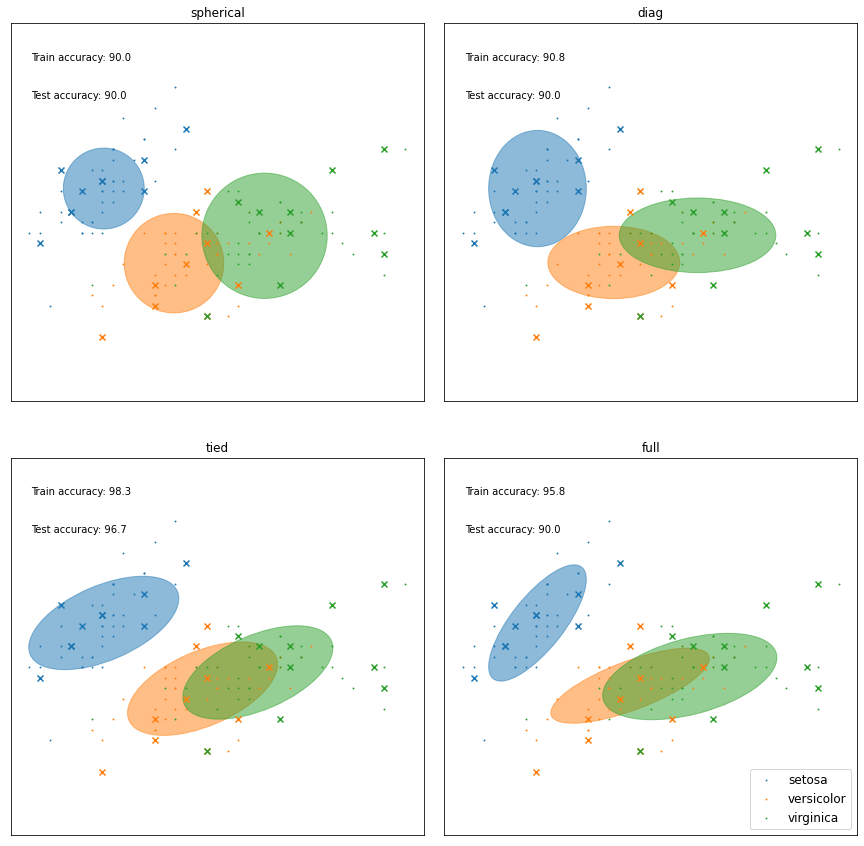

In [8]:
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0, verbose=2
    )
    for cov_type in ["spherical", "diag", "tied", "full"]
}

n_estimators = len(estimators)

plt.figure(figsize=(6*n_estimators//2, 12))
plt.subplots_adjust(
    bottom=0.01, top=0.95, hspace=0.15, wspace=0.05, left=0.01, right=0.99
)

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1])*gmm.covariances_[n] # means_ のサイズは (n_classes, n_features)
            print(gmm.means_.shape)
        v, w = np.linalg.eigh(covariances)
        u = w[0]/np.linalg.norm(w[0])
        angle = np.rad2deg(np.arctan2(u[1], u[0]))
        v = 2.0*np.sqrt(2.0)*np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

for index, (name, estimator) in enumerate(estimators.items()):
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0) for i in range(n_classes)])

    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators//2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris_datasets.data[iris_datasets.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color, label=iris_datasets.target_names[n])
    
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)
    
    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel())*100
    plt.text(0.05, 0.9, "Train accuracy: %.1f" % train_accuracy, transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, "Test accuracy: %.1f" % test_accuracy, transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))


plt.show()

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, StratifiedKFold

K_FOLD_SPLITS = 4

covtype_datasets = datasets.fetch_covtype()

covtype_datasets.DESCR

".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30×30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.\nSome of the features are boolean indicators,\nwhile others are discrete or continuous measurements.\n\n**Data Set Characteristics:**\n\n    =================   ============\n    Classes                        7\n    Samples total             581012\n    Dimensionality                54\n    Features                     int\n    =================   ============\n\n:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;\nit returns a dictionary-like 'Bunch' object\nwith the feature matrix in the ``data`` member\nand the target values i

In [3]:
covtype_datasets.feature_names[:10]

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [4]:
covtype_datasets.data[:, :10].shape

(581012, 10)

In [6]:
for i in range(10):
    print(covtype_datasets.data[:, i])

[2596. 2590. 2804. ... 2386. 2384. 2383.]
[ 51.  56. 139. ... 159. 170. 165.]
[ 3.  2.  9. ... 17. 15. 13.]
[258. 212. 268. ...  60.  60.  60.]
[ 0. -6. 65. ...  7.  5.  4.]
[ 510.  390. 3180. ...   90.   90.   67.]
[221. 220. 234. ... 236. 230. 231.]
[232. 235. 238. ... 241. 245. 244.]
[148. 151. 135. ... 130. 143. 141.]
[6279. 6225. 6121. ...  854.  864.  875.]


In [11]:
from sklearn import preprocessing

temp = covtype_datasets.data[:, :10]
for i in range(10):
    print(temp[:, i])

[2596. 2590. 2804. ... 2386. 2384. 2383.]
[ 51.  56. 139. ... 159. 170. 165.]
[ 3.  2.  9. ... 17. 15. 13.]
[258. 212. 268. ...  60.  60.  60.]
[ 0. -6. 65. ...  7.  5.  4.]
[ 510.  390. 3180. ...   90.   90.   67.]
[221. 220. 234. ... 236. 230. 231.]
[232. 235. 238. ... 241. 245. 244.]
[148. 151. 135. ... 130. 143. 141.]
[6279. 6225. 6121. ...  854.  864.  875.]


In [13]:
from sklearn import preprocessing

ss_temp = preprocessing.scale(temp, axis=0)
for i in range(10):
    print(ss_temp[:, i])

[-1.29780509 -1.31923485 -0.5549068  ... -2.04784663 -2.05498988
 -2.05856151]
[-0.93515698 -0.89047967 -0.14883628 ...  0.02987297  0.12816306
  0.08348575]
[-1.48281978 -1.61636259 -0.68156292 ...  0.38677957  0.11969395
 -0.14739167]
[-0.0537674  -0.27018791 -0.00671946 ... -0.98531655 -0.98531655
 -0.98531655]
[-0.79627259 -0.89919705  0.31874238 ... -0.67619406 -0.71050221
 -0.72765629]
[-1.18014587 -1.25710577  0.53221197 ... -1.44950553 -1.44950553
 -1.46425618]
[0.33074321 0.29338778 0.81636388 ... 0.89107475 0.66694213 0.70429757]
[0.43914331 0.59089851 0.74265371 ... 0.89440891 1.09674918 1.04616411]
[ 0.1429604   0.22134157 -0.19669136 ... -0.32732665  0.01232511
 -0.03992901]
[ 3.24628306  3.20550354  3.1269652  ... -0.85054846 -0.8429967
 -0.83468976]


In [14]:
print(covtype_datasets.feature_names)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']


In [15]:
import itertools

In [16]:
l = np.arange(0, 3)
for v in itertools.permutations(l, 3):
    print(v)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)
